# Summary
#  Name: Bill Koch
* Due: 12:30pm, Setember 28, Tuesday

In this homework assignment, you will create an algorithm to distinguish dogs from cats. Study the following three colab examples provided by Google.
* [**Building a Classifier Model From Scratch**, *Part 1 of Cat vs Dog*](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=YHK6DyunSbs4)
* [**Improving the Model using Data Augmentation and Dropout**, *Part 2 of Cat vs Dog*](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part2.ipynb#scrollTo=GrFpZXNQB9FW)
* [**Feature Extraction and Fine tuning**, *Part 3 of Cat vs Dog*](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb)



# Sample Data

Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in `/tmp`.

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets, which in turn each contain `cats` and `dogs` subdirectories. Let's define each of these directories: 



In [1]:
import os
import zipfile
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sn
import pandas as pd

import sklearn as sk
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [2]:
base_dir = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print("")
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000

Total validation cat images: 500
Total validation dog images: 500


# Assignment #1: Inspect data

### Write code below to find out how many cat or dog images in these four directories: 
* `train_cats_dir`
* `train_dogs_dir`
* `validation_cats_dir`
*  `validation_dogs_dir`

In [3]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print("")
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000

Total validation cat images: 500
Total validation dog images: 500


### Randomly select three pictures from each of the four subdirectories mentioned previously. Your plot should be friendly. For example, all three images from the same sub-directory should be shown in a single row, and the filename of each image (not full path) should be shown underneath the image.

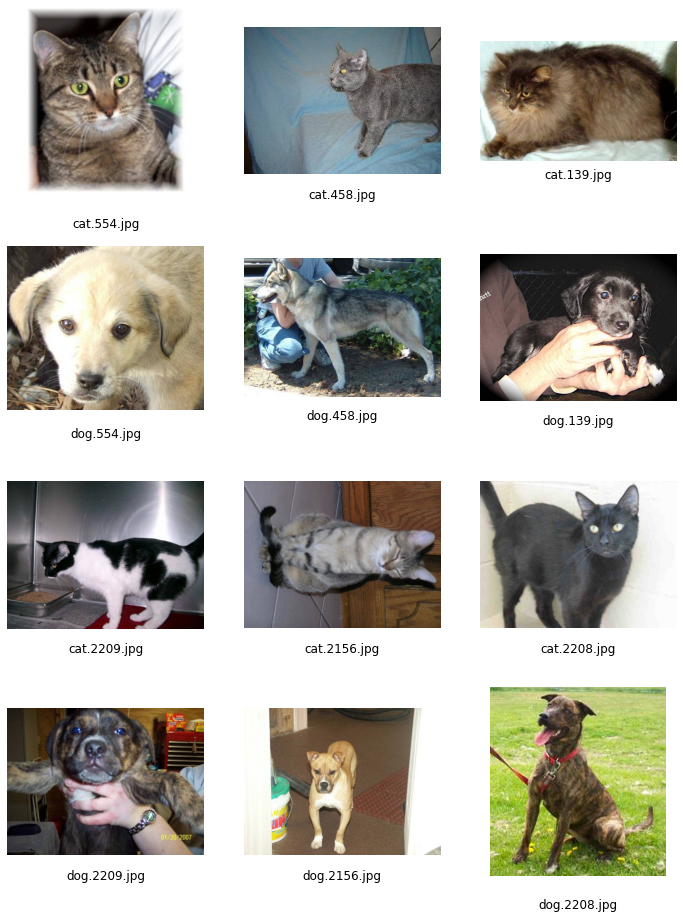

In [4]:
# Get file names
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

# Randomly select 3 images from each set. Note that data sets have different ranges hence the 1000 vs. 500 for random.
rand_indices = np.random.permutation(1000)
next_animal_pix =[]
for i in range(3):
  next_animal_pix.append(os.path.join(train_cats_dir, train_cat_fnames[rand_indices[i]]))
for i in range(3):
  next_animal_pix.append(os.path.join(train_dogs_dir, train_dog_fnames[rand_indices[i]]))
rand_indices = np.random.permutation(500)
for i in range(3):
  next_animal_pix.append(os.path.join(validation_cats_dir, validation_cat_fnames[rand_indices[i]]))
for i in range(3):
  next_animal_pix.append(os.path.join(validation_dogs_dir, validation_dog_fnames[rand_indices[i]]))

#Configuring pyplot image as 4*3 with each image as a subplot, and titles below them.
fig = plt.gcf()
fig.set_size_inches(12, 16)

for i, img_path in enumerate(next_animal_pix):
  sp = plt.subplot(4, 3, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
  #os.path.basename returns just the file name.
  plt.title(label=os.path.basename(img_path), y=-0.2)

plt.show()

# Assignment #2: Image classification by fine-tuning ResNet50

Keras provides the implementation of a few popular network, such as VGG, ResNet, etc. You can find more information from the following link: [Keras Applications](https://keras.io/applications/)

You should read [**Feature Extraction and Fine tuning**, *Part 3 of Cat vs Dog*](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb) carefully to learn how to use **`ImageDataGenerator`** and **`flow_from_directory`**. You can also find fine-tuning examples on Keras website: [Keras Applications](https://keras.io/applications/)

* Use the pre-trained weights for ImageNet
* Both the training accuracy and the validation accurracy should be higher than 90%.

In [5]:
# Setup ImageDataGenerator using special ResNet preprocessing function (changes color data)
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

#ResNet uses 224*224 image sizes. Initializing as binary due to 0=cat,1=dog implementation.
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#Preload ResNet50 with imagenet weights and freeze all layers.
pre_trained_model = ResNet50(weights='imagenet')
pre_trained_model.summary()
for layer in pre_trained_model.layers:
  layer.trainable = False
#Stop pre-trained model earlier than end. Conv5_block3_out is (None, 7, 7, 2048) and last before average pool.
last_layer = pre_trained_model.get_layer('conv5_block3_out')
last_output = last_layer.output

#Starting the beginning of my model now:
# Starting with GlobalAveragePooling2D
x = layers.GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for binary classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)



Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
#Train only my new layers first.
#Using Adam with lr=0.001 and epsilon=0.1 because it's good at ImageNet, apparently.
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001, epsilon=0.1),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)


Epoch 1/10
100/100 [==============================] - 22s 74ms/step - loss: 0.3162 - acc: 0.8765 - val_loss: 0.1239 - val_acc: 0.9750

Text(0.5, 1.0, 'Training and validation loss')

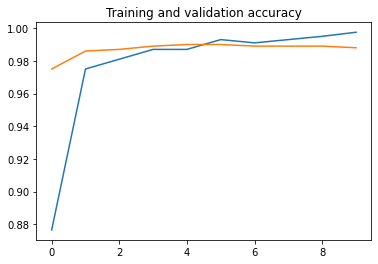

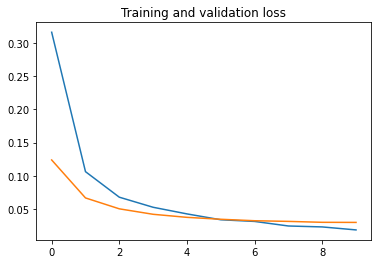

In [8]:
#Early evaluate with only training last few layers
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [9]:
# Unfreeze model and train everything.
for layers in model.layers:
    layer.trainable = True
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001, epsilon=0.1),
              steps_per_execution=10,
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)


Epoch 1/10
100/100 [==============================] - 10s 103ms/step - loss: 0.0176 - acc: 0.9970 - val_loss: 0.0286 - val_acc: 0.9890
Epoch 2/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0179 - acc: 0.9955 - val_loss: 0.0283 

Text(0.5, 1.0, 'Training and validation loss')

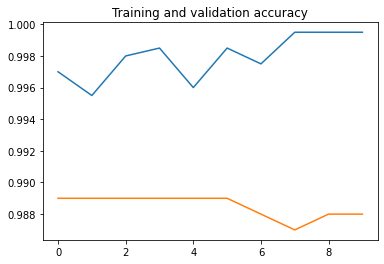

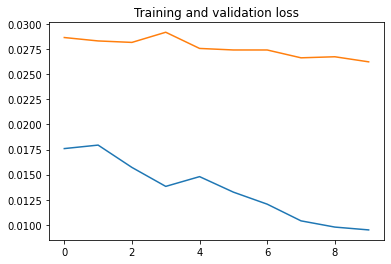

In [10]:
#Pyplot setup to graph accuracy and loss.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [11]:
# Begin with inbuilt Keras evaluate feature
evaluation = model.evaluate(train_generator, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

100/100 [==============================] - 5s 50ms/step - loss: 0.0067 - acc: 1.0000
Summary: Loss over the test dataset: 0.01, Accuracy: 1.00


# Assignment #3: Performance analysis

The [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from the sklearn package can be used to create the confusion matrix of classification for training and testing. 

* You can also use [`predict_generator`](https://keras.io/models/sequential/) to generate the prediction for the training datasets or the testing dataset.
* It is necessory to run `train_generator.reset()` or `validation_generator.reset()` to force the generator to re-start from beginning
* The following in-completed code can give you some hints
```
validation_generator.reset() 
Y_pred = net.predict_generator(validation_generator, ... )
y_pred = np.argmax(Y_pred, axis=1)
y_truth = valid_batches.classes[valid_batches.index_array]
print('Confusion Matrix')
cm = confusion_matrix(y_truth, y_pred)
print(cm)
```



In [18]:
# Code to find out the confusion matrix for training
# Step 1 - Predict and create truth matrix
# Always, always remember to stop shuffling generator.
train_generator.shuffle = False
train_generator.reset()
Y_train_pred = model.predict(train_generator)
y_train_pred = np.rint(Y_train_pred)
print(Y_train_pred)
y_train_truth = train_generator.labels

[[6.7146245e-04]
 [1.7713233e-04]
 [5.1717223e-05]
 ...
 [9.9905032e-01]
 [9.9905413e-01]
 [9.9997032e-01]]


Confusion Matrix
[[1000    0]
 [   0 1000]]


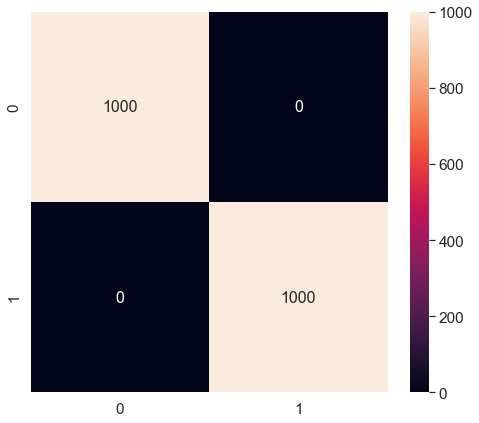

In [19]:
# Code to find out the confusion matrix for training
# Step 2 - Display Confusion Matrix and SB
print('Confusion Matrix')
cm_train = confusion_matrix(y_train_truth, y_train_pred)
print(cm_train)
df_cm = pd.DataFrame(cm_train, range(2), range(2))
plt.figure(figsize=(8,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.show()

In [16]:
# Code to find out the confusion matrix for testing
# Step 1 - Predict and create truth matrix
validation_generator.shuffle = False
validation_generator.reset()
Y_valid_pred = model.predict(validation_generator)
y_valid_pred = np.rint(Y_valid_pred)
y_valid_truth = validation_generator.labels

Confusion Matrix
[[492   8]
 [  4 496]]


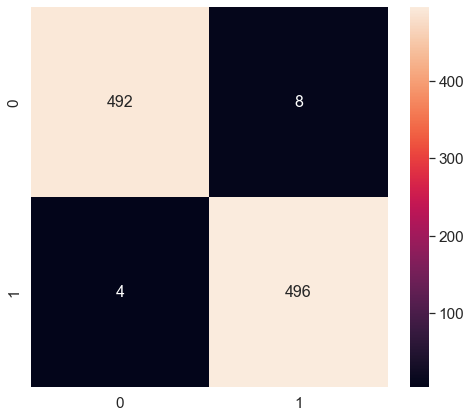

In [17]:
# Code to find out the confusion matrix for testing
# Step 2 - Display Confusion Matrix and SB
print('Confusion Matrix')
cm_valid = confusion_matrix(y_valid_truth, y_valid_pred)
print(cm_valid)
df_cm = pd.DataFrame(cm_valid, range(2), range(2))
plt.figure(figsize=(8,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.show()

In [51]:
# External sources: https://colab.research.google.com/drive/1gBJC01rZ6RzelM2yP0hZXWkQtd7R-MMW
import matplotlib.cm as cm
img_size = (224, 224)
preprocess_input = tf.keras.applications.resnet.preprocess_input
decode_predictions = tf.keras.applications.resnet.decode_predictions

last_conv_layer_name = "conv5_block3_out"
classifier_layer_names = [
    "global_average_pooling2d",
    "dense",
    "dense_1"
]

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0) #add dim
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [52]:
def CAMfull(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("viridis")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * 0.6 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

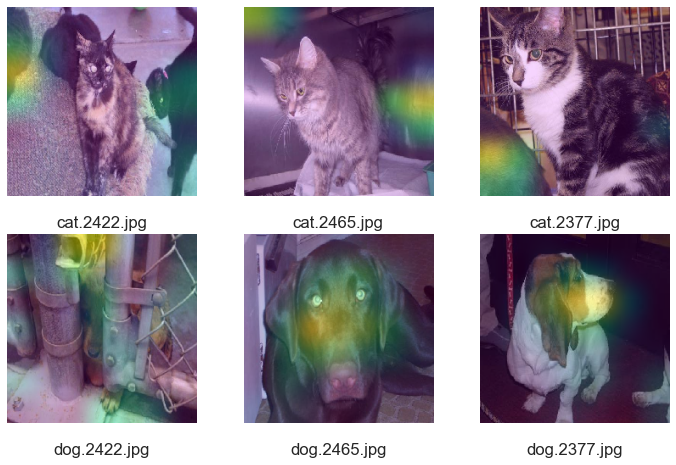

In [54]:
# Get file names
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

# Randomly select 3 dogs and cats from validation.
next_animal_pix =[]
rand_indices = np.random.permutation(500)
for i in range(3):
  next_animal_pix.append(os.path.join(validation_cats_dir, validation_cat_fnames[rand_indices[i]]))
for i in range(3):
  next_animal_pix.append(os.path.join(validation_dogs_dir, validation_dog_fnames[rand_indices[i]]))

#Configuring pyplot image as 4*3 with each image as a subplot, and titles below them.
fig = plt.gcf()
fig.set_size_inches(12, 16)

for i, img_path in enumerate(next_animal_pix):
  sp = plt.subplot(4, 3, i + 1)
  sp.axis('Off')

  super_img = CAMfull(img_path)
  plt.imshow(super_img)
  #os.path.basename returns just the file name.
  plt.title(label=os.path.basename(img_path), y=-0.2)

plt.show()